In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
data.shape

(284807, 31)

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
print("Fraud Statistics")

avg_amt = data[data['Class']== 1]['Amount'].mean()
std_dev_amt = data[data['Class']== 1]['Amount'].std()
min_amt = data[data['Class']== 1]['Amount'].min()
max_amt = data[data['Class']== 1]['Amount'].max()

print(f"The average amount is {avg_amt}")
print(f"The std deviation for amount is {std_dev_amt}")
print(f"The min amount is {min_amt}")
print(f"The max amount is {max_amt}")

Fraud Statistics
The average amount is 122.21132113821133
The std deviation for amount is 256.68328829771207
The min amount is 0.0
The max amount is 2125.87


In [9]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
print(f'Non-Fraud is: {100*284315/(284315+492)}%')

Non-Fraud is: 99.827251436938%


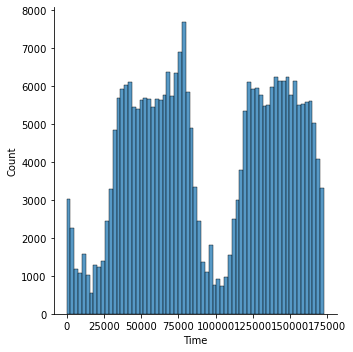

In [11]:
sns.displot(data["Time"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

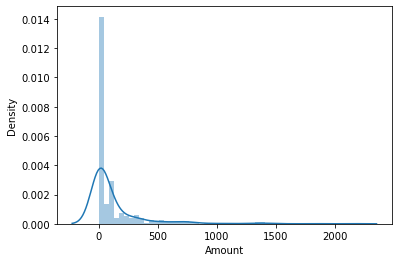

In [12]:
sns.distplot(data[data['Class'] == 1]['Amount'])

<AxesSubplot:>

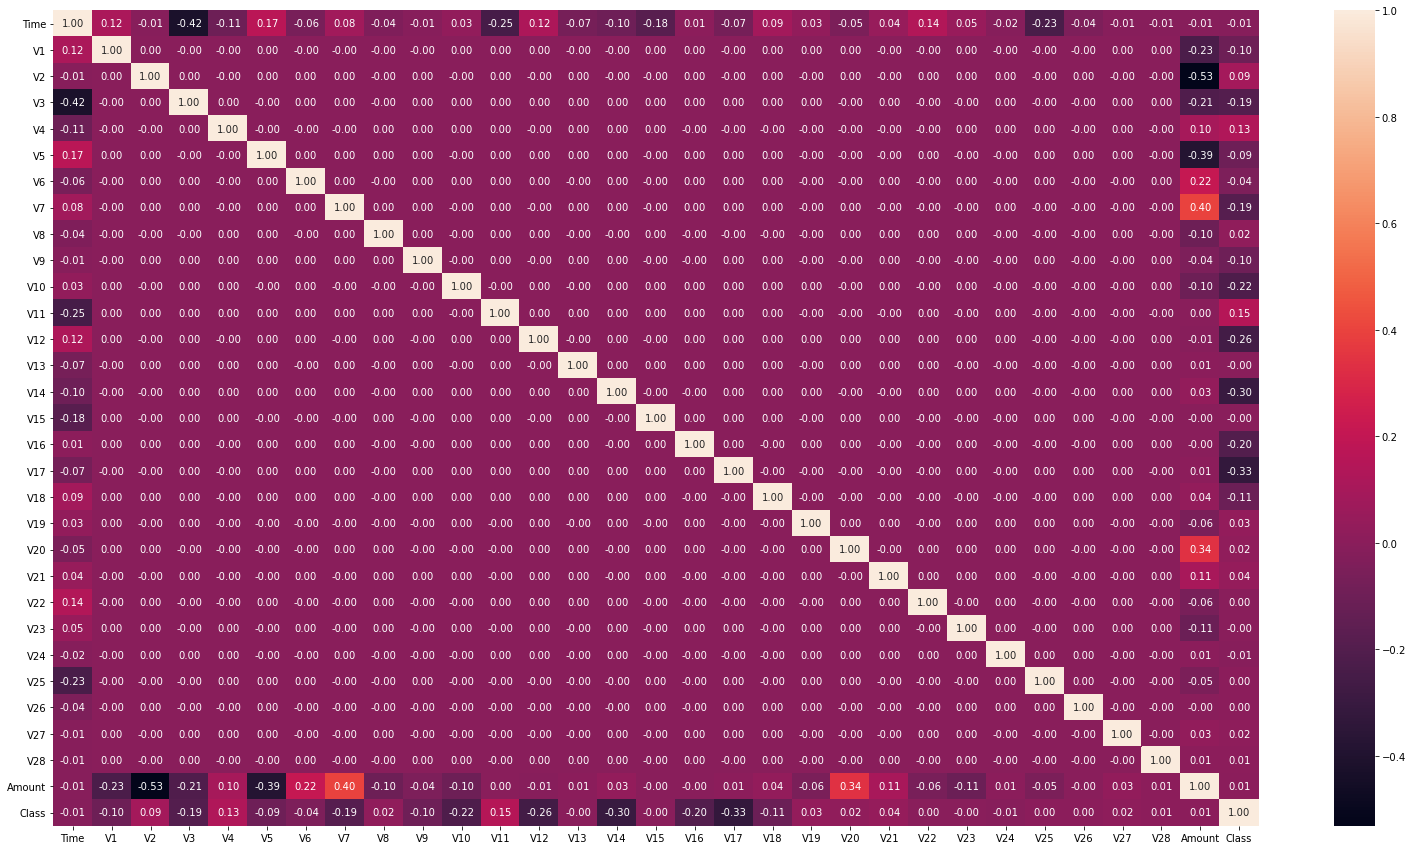

In [13]:
plt.figure(figsize = (27,15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True,fmt=".2f")

In [14]:
dataC = data.copy()

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

dataC[['Time', 'Amount']] = sc.fit_transform(dataC[['Time', 'Amount']])
dataC.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-1.050379e-14,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,3.202236e-16,0.001727
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


In [16]:
frauds = dataC[dataC['Class']==1].copy()
non_frauds = dataC[dataC['Class']==0].copy()
x_train_fraud = frauds.sample(frac=0.8, random_state=27)
x_test_fraud = frauds.loc[~frauds.index.isin(x_train_fraud.index)]

x_train_non_fraud = non_frauds.sample(frac=0.8, random_state=27)
x_test_non_fraud = non_frauds.loc[~non_frauds.index.isin(x_train_non_fraud.index)]
print(f'Train \'fraud\' shape is: {x_train_fraud.shape}')
print(f'Test \'fraud\' shape is: {x_test_fraud.shape}')
print(f'Train \'non-fraud\' shape is: {x_train_non_fraud.shape}')
print(f'Test \'non-fraud\' shape is: {x_test_non_fraud.shape}')

Train 'fraud' shape is: (394, 31)
Test 'fraud' shape is: (98, 31)
Train 'non-fraud' shape is: (227452, 31)
Test 'non-fraud' shape is: (56863, 31)


In [17]:
train = pd.concat([x_train_non_fraud, x_train_fraud])
test = pd.concat([x_test_non_fraud, x_test_fraud])
# Shuffle dataframes in-place and reset the index
train = train.sample(frac=1, random_state=27).reset_index(drop=True)
test = test.sample(frac=1, random_state=27).reset_index(drop=True)
print(f'Original size is: {data.shape}')
print(f'Train size is: {train.shape} with perc = {train.shape[0]/data.shape[0]}')
print(f'Test size is: {test.shape} with perc = {test.shape[0]/data.shape[0]}')

Original size is: (284807, 31)
Train size is: (227846, 31) with perc = 0.8000014044598623
Test size is: (56961, 31) with perc = 0.1999985955401377


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support

Accuracy: 0.9991046505503766
AUC     : 0.7907283958903013
Precision: 0.8507462686567164
Recall: 0.5816326530612245
F1_score: 0.6909090909090908


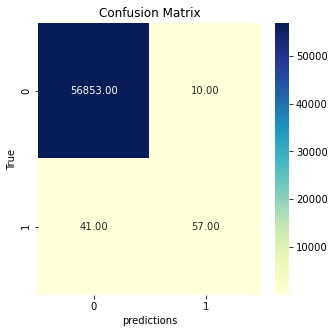

In [19]:
def evaluate_model(labels, preds):
    accuracy = (preds == labels).sum() / preds.shape[0]
    print(f'Accuracy: {accuracy}')

    auc = roc_auc_score(labels, preds)
    print(f'AUC     : {auc}')

    precision, recall, f1_score, _ = precision_recall_fscore_support(labels, preds, average = 'binary')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1_score: {f1_score}')

    confusion_matrix = pd.crosstab(index=labels, columns=np.round(preds), 
                                   rownames=['True'], colnames=['predictions']).astype(int)
    plt.figure(figsize = (5,5))
    sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix') 
    
    return {'Accuracy':accuracy, 'Auc':auc, 'Precicion':precision, 'Recall':recall, 'F1_Score':f1_score}
xtrain = train.drop(columns=['Class'], axis=1)
ytrain = train.Class

xtest = test.drop(columns=['Class'], axis=1)
ytest = test.Class
logReg_base = LogisticRegression()
logReg_base.fit(xtrain, ytrain)

predictions_base = logReg_base.predict(xtest)
result_base = evaluate_model(ytest, predictions_base)

Text(0.5, 1.0, 'Original Distribution of the dataset')

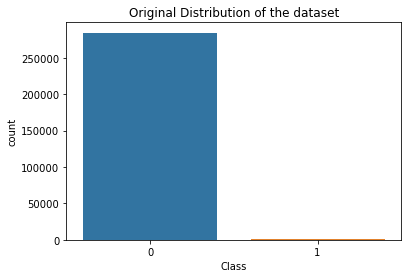

In [20]:
sns.countplot(x=data['Class'])
plt.title('Original Distribution of the dataset')

In [21]:
from imblearn.under_sampling import RandomUnderSampler

'''
xtrain: training features
ytrain: training labels

xtest: testinf features
ytest: testing labels
'''

rus = RandomUnderSampler(random_state=27)

# Undersample the training data
X_rus, Y_rus = rus.fit_resample(xtrain, ytrain) 
rus_train = pd.DataFrame(X_rus)
rus_train['Class'] = Y_rus

# Undersample the testing data
x_rus, y_rus = rus.fit_resample(xtest, ytest) 
rus_test = pd.DataFrame(x_rus)
rus_test['Class'] = y_rus

# Shuffle the data
rus_train = rus_train.sample(frac=1, random_state=345).reset_index(drop=True)
rus_test = rus_test.sample(frac=1, random_state=345).reset_index(drop=True)
rus_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.400055,-2.048756,0.364902,1.174581,0.130471,-0.476529,1.755552,-0.927228,1.736772,-0.030409,...,0.380679,1.089170,0.075723,-0.784817,-0.348552,0.575119,0.082633,-0.106446,-0.153525,0
1,1.109482,-1.611877,-0.408410,-3.829762,6.249462,-3.360922,1.147964,1.858425,0.474858,-3.838399,...,1.245582,0.616383,2.251439,-0.066096,0.538710,0.541325,-0.136243,-0.009852,3.629944,1
2,0.678763,1.944768,0.142823,-1.427969,1.667456,0.125815,-0.879680,0.129552,-0.182982,0.797122,...,0.043060,0.384190,-0.008412,-0.147620,0.285231,-0.455664,0.032640,-0.022698,-0.265391,0
3,1.268532,-0.512349,4.827060,-7.973939,7.334059,0.367704,-2.055129,-2.935856,1.431008,-4.544722,...,0.535620,-0.459496,-0.009364,-1.140436,-0.006445,0.527970,0.558881,0.126517,-0.350151,1
4,-0.020086,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,...,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,0.400490,1


In [22]:
print(f'Original size: {train.shape[0]}')
print(f'New size: {rus_train.shape[0]}')
print(f'Removed: {rus_train.shape[0]-data.shape[0]}')

Original size: 227846
New size: 788
Removed: -284019


<AxesSubplot:xlabel='Class', ylabel='count'>

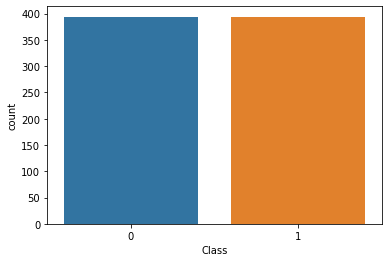

In [23]:
sns.countplot(x=rus_train['Class'])

<AxesSubplot:>

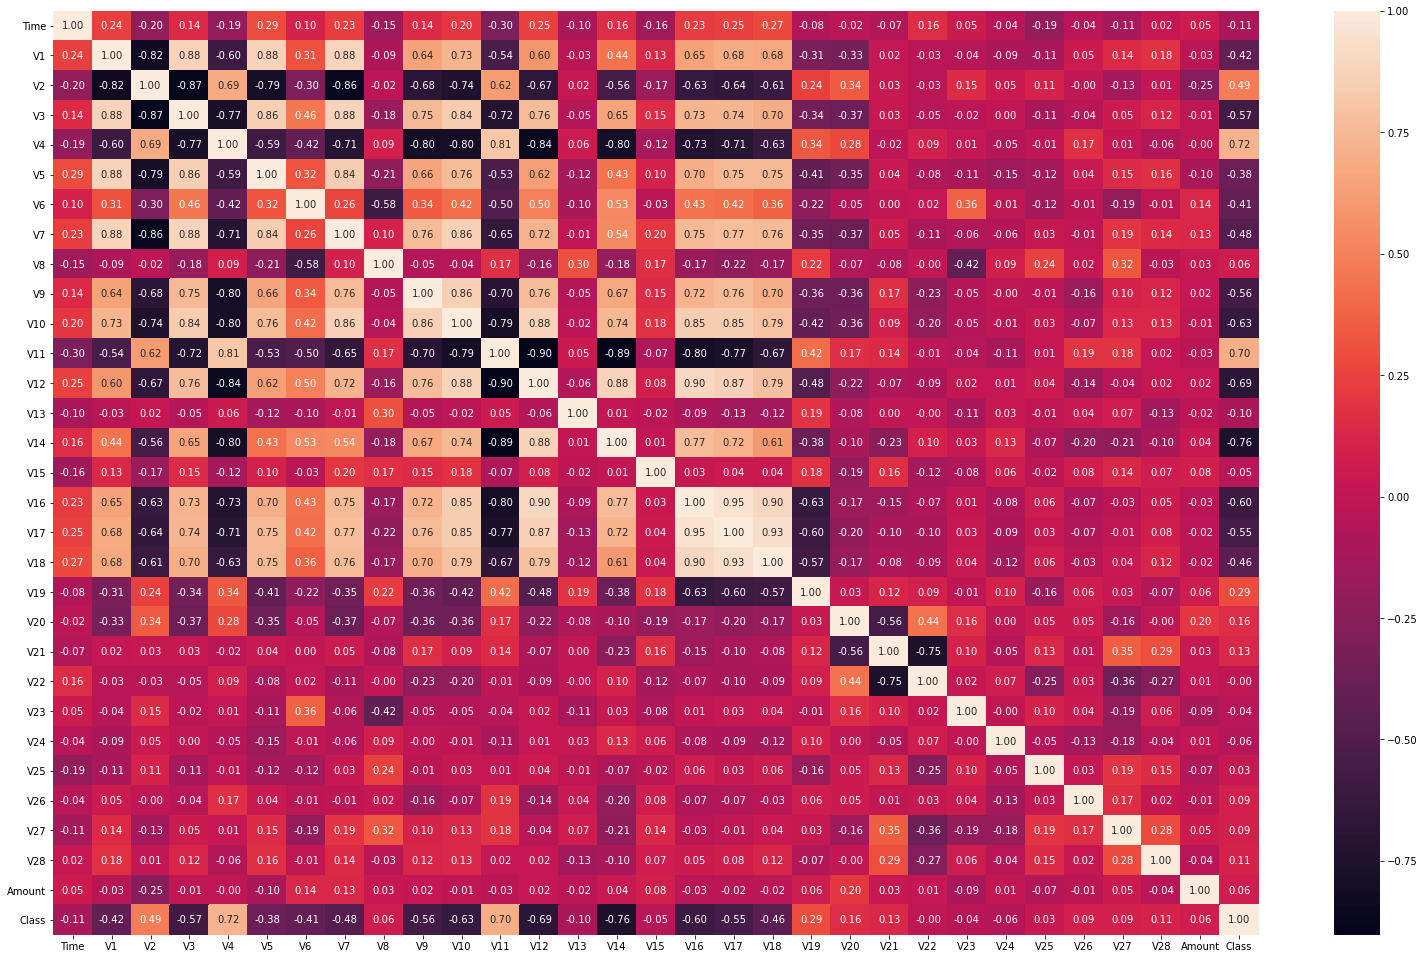

In [24]:
plt.figure(figsize = (27,17))
rus_correlation_matrix = rus_train.corr()
sns.heatmap(rus_correlation_matrix, annot=True, fmt=".2f")

In [25]:
xtrain_rus = rus_train.drop(columns=['V16', 'V18', 'Class'], axis=1)
ytrain_rus = rus_train['Class']
logReg_rus = LogisticRegression()
logReg_rus.fit(xtrain_rus, ytrain_rus)

LogisticRegression()

Accuracy: 0.9336734693877551
AUC     : 0.9336734693877552
Precision: 0.967032967032967
Recall: 0.8979591836734694
F1_score: 0.9312169312169313


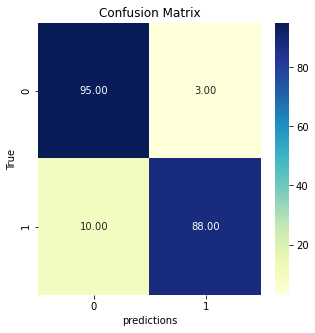

In [26]:
xtest_rus = rus_test.drop(columns=['V16', 'V18', 'Class'], axis=1)
ytest_rus = rus_test['Class']

predictions_rus = logReg_rus.predict(xtest_rus)
result_rus = evaluate_model(ytest_rus, predictions_rus)

In [27]:
from imblearn.over_sampling import SMOTE

'''
xtrain: training features
ytrain: training labels

xtest: testinf features
ytest: testing labels
'''

smote = SMOTE(random_state=27)

# Undersample the training data
X_smote, Y_smote = smote.fit_resample(xtrain, ytrain)
smote_train = pd.DataFrame(X_smote)
smote_train['Class'] = Y_smote

# Undersample the testing data
x_smote, y_smote = smote.fit_resample(xtest, ytest) 
smote_test = pd.DataFrame(x_smote)
smote_test['Class'] = y_smote

# Shuffle the data
smote_train = smote_train.sample(frac=1, random_state=345).reset_index(drop=True)
smote_test = smote_test.sample(frac=1, random_state=345).reset_index(drop=True)

smote_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.024748,-1.346318,2.132334,-1.854373,2.117032,-1.070431,-1.092710,-2.231012,1.036377,-1.895428,...,0.609502,0.202871,-0.060804,-0.186677,-0.017318,-0.283745,0.395472,0.233146,-0.349229,1
1,-1.025084,-1.510370,2.103408,-1.224184,1.213674,-0.352835,-1.305184,-1.554245,-0.580395,-1.211177,...,1.170231,-0.033768,-0.251196,0.105883,0.049513,-0.566455,0.477850,-0.041633,-0.347744,1
2,1.041865,-1.529577,-0.726943,2.289511,-1.459540,-1.859432,-0.946735,-0.630958,0.583659,-0.683955,...,0.459360,0.643726,0.101476,0.886894,0.243996,-0.167250,-0.104441,-0.062874,0.181994,0
3,-0.711583,-1.001022,-0.317446,1.226052,1.488646,-0.231864,0.758605,1.214337,-0.171165,-0.256514,...,0.217063,0.706330,0.424728,-0.577519,-0.017667,-0.054545,-0.041361,0.007885,0.752071,1
4,-0.483998,1.140358,1.141485,-1.443203,2.033131,0.672412,-1.103840,0.235451,0.029470,0.104444,...,-0.373911,-0.883528,-0.147851,-0.189195,0.657342,-0.337353,0.079204,0.116093,-0.349231,1


In [28]:
print(f'Original size: {train.shape[0]}')
print(f'New size: {smote_train.shape[0]}')
print(f'Added: {smote_train.shape[0]-train.shape[0]}')

Original size: 227846
New size: 454904
Added: 227058


<AxesSubplot:xlabel='Class', ylabel='count'>

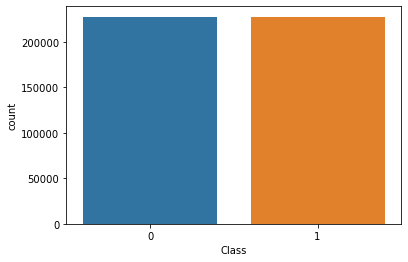

In [29]:
sns.countplot(x=smote_train['Class'])

<AxesSubplot:>

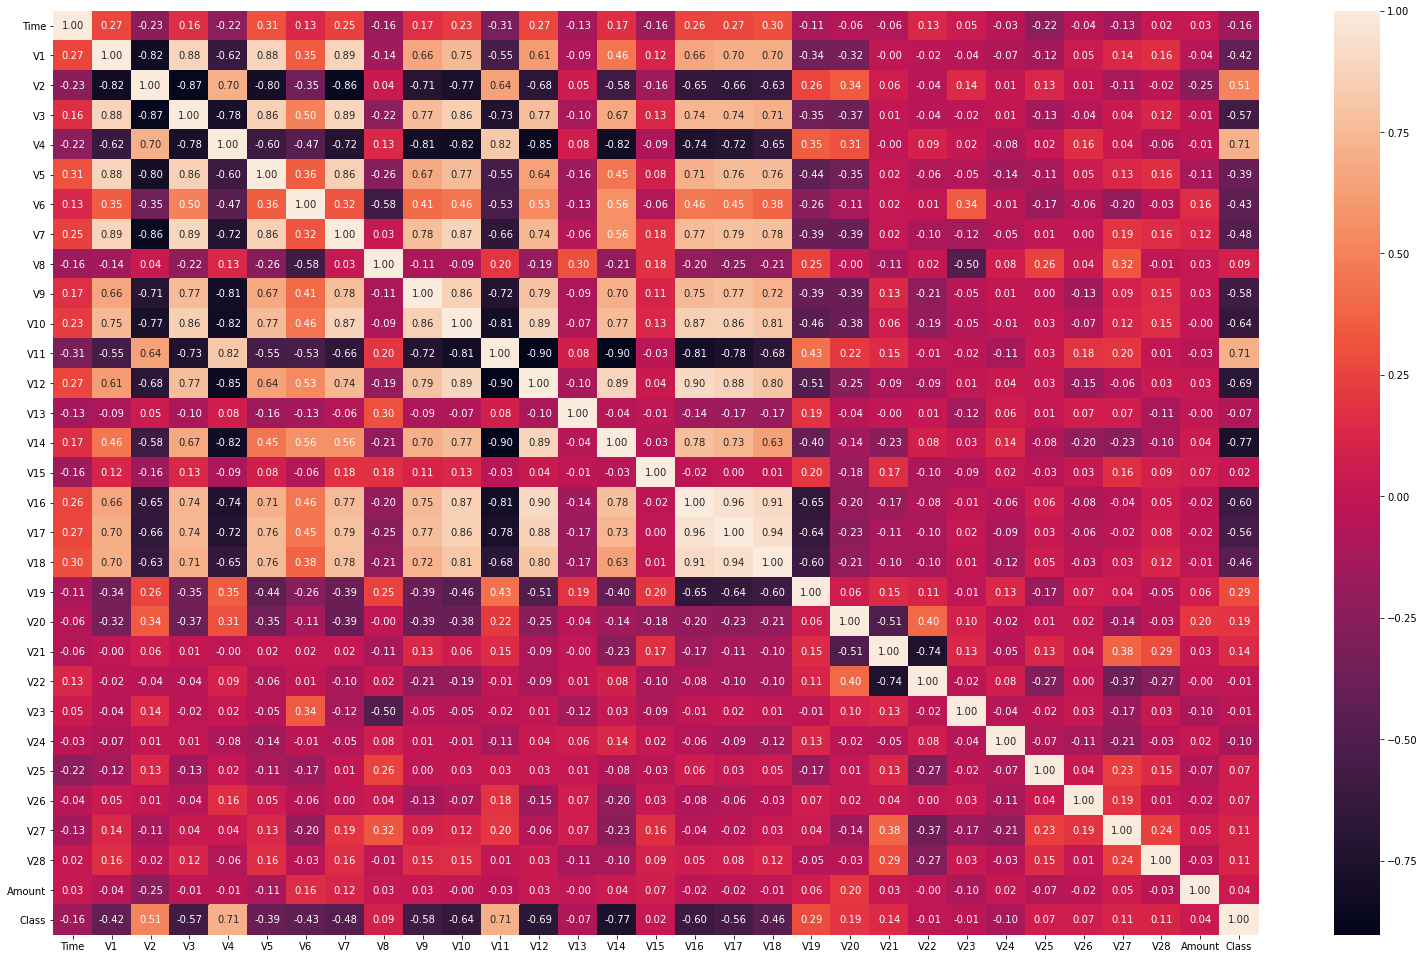

In [30]:
plt.figure(figsize = (27,17))
smote_correlation_matrix = smote_train.corr()
sns.heatmap(smote_correlation_matrix, annot=True, fmt=".2f")

In [31]:
xtrain_smote = smote_train.drop(columns=['V16', 'V18', 'Class'], axis=1)
ytrain_smote = smote_train['Class']
logReg_smote = LogisticRegression()
logReg_smote.fit(xtrain_smote, ytrain_smote)

LogisticRegression()

Accuracy: 0.9330232312751702
AUC     : 0.9330232312751702
Precision: 0.9737378790210867
Recall: 0.8900515273552222
F1_score: 0.9300158950376245


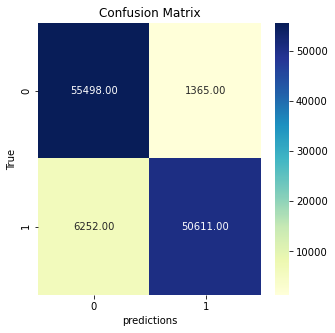

In [32]:
xtest_smote = smote_test.drop(columns=['V16', 'V18', 'Class'], axis=1)
ytest_smote = smote_test['Class']

predictions_smote = logReg_smote.predict(xtest_smote)
result_smote = evaluate_model(ytest_smote, predictions_smote)

Accuracy: 0.9276242899600795
AUC     : 0.9276242899600795
Precision: 0.957205174488568
Recall: 0.895274607389691
F1_score: 0.9252046852708389


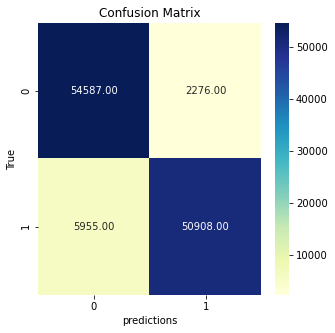

In [33]:
predictions_rus = logReg_rus.predict(xtest_smote)
result_ruc_smote = evaluate_model(ytest_smote, predictions_rus)

In [34]:
all_results = pd.DataFrame({'BaseLine':result_base, 'RUC':result_rus,
                            'SMOTE':result_smote, 'RUC-SMOTE':result_ruc_smote})

all_results

,BaseLine,RUC,SMOTE,RUC-SMOTE
Accuracy,0.999105,0.933673,0.933023,0.927624
Auc,0.790728,0.933673,0.933023,0.927624
Precicion,0.850746,0.967033,0.973738,0.957205
Recall,0.581633,0.897959,0.890052,0.895275
F1_Score,0.690909,0.931217,0.930016,0.925205
